# Plot
Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path

path = str(Path.cwd().parent)
sys.path.append(path)

In [2]:
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from datatype.imaging import to_numpy
from datatype.spectrogram import compress
from io import BytesIO
from matplotlib import lines
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
from scipy.spatial import cKDTree

In [3]:
def get_songtype(name, folder):
    name = (
        name
        .replace('STE', '')
        .replace(f"_{folder}", '')
    )

    if len(name) > 2:
        return name[:2]

    return name

In [4]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [5]:
folder = 'DgDgY_STE2017'

individual = dataframe[dataframe.folder == folder]
individual.reset_index(inplace=True)
individual = individual.copy()

In [6]:
individual['songtype'] = (
    individual['filename']
    .apply(
        lambda x: get_songtype(x, folder)
    )
).astype('uint8')

In [7]:
selection = [
    i.songtype.unique() for _, i in individual.groupby('songtype')
    if i.filename.unique().size > 1
]

selection = (
    np.concatenate(selection)
    .ravel()
    .tolist()
)

selection

[1, 4, 5, 7, 11, 12, 15, 21]

In [8]:
mask = (
    (individual.filename == 'STE05_DgDgY2017') |
    (individual.filename == 'STE18_DgDgY2017')
)

songtype = individual[mask]
songtype.reset_index(inplace=True)
songtype = songtype.copy()

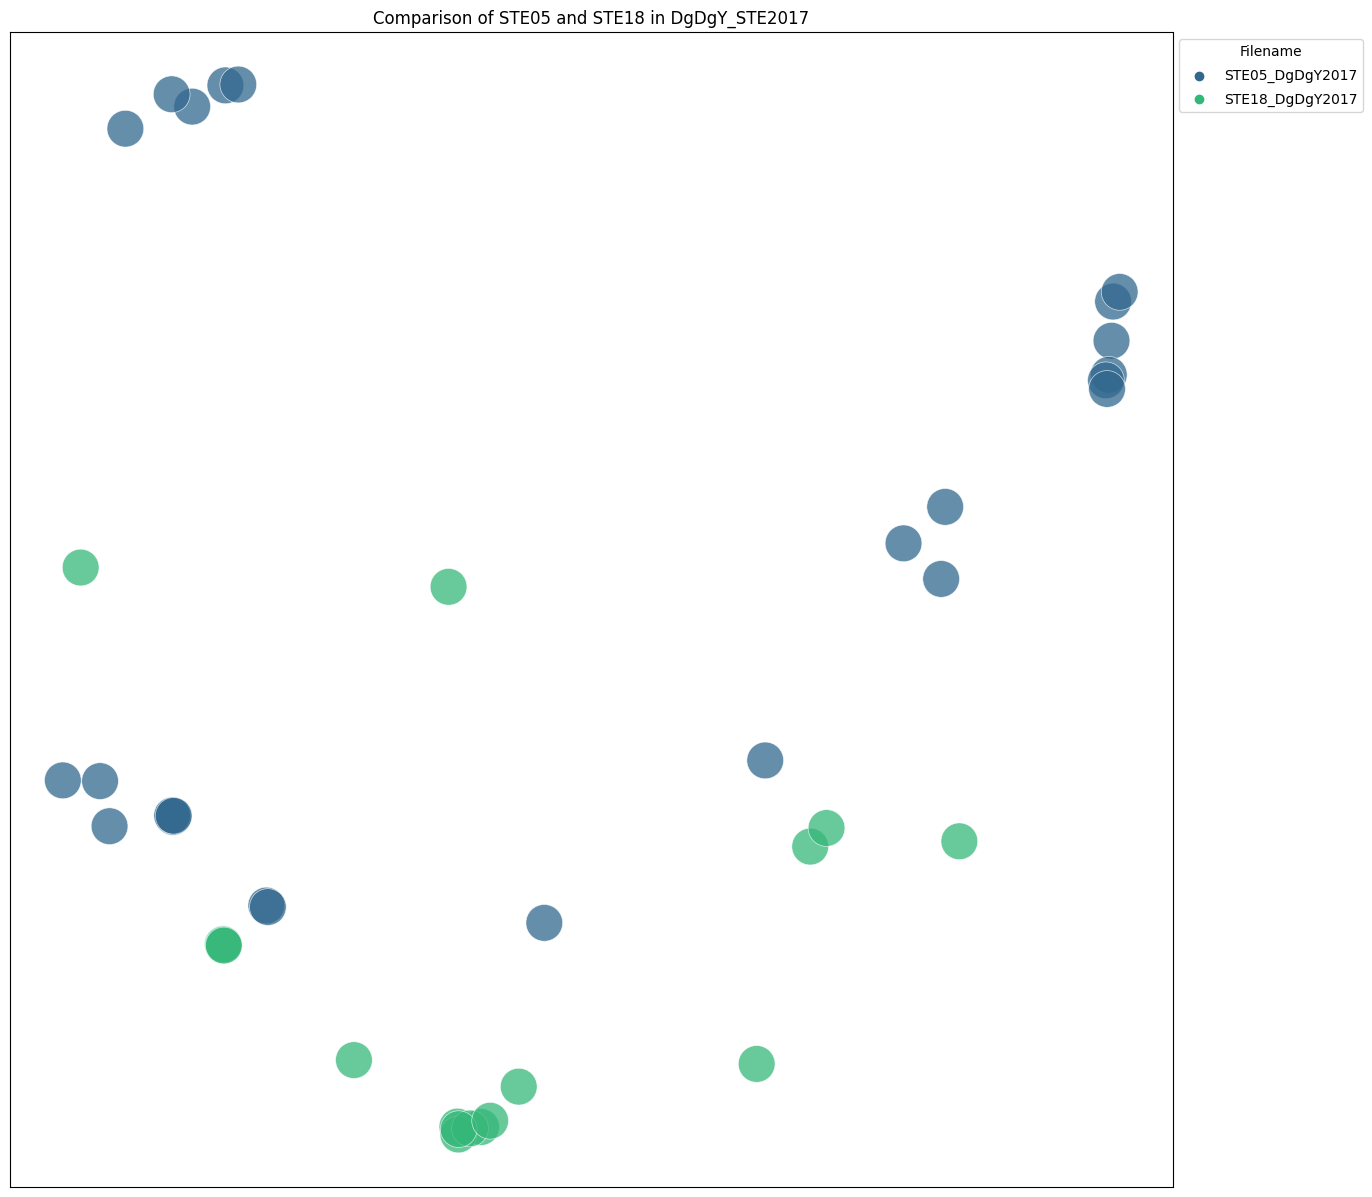

In [9]:
title = f"Comparison of STE05 and STE18 in {folder}"

by = ['filename']
ascending = [True]

individual.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='filename',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='viridis',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    title='Filename'
)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"{folder}_songtype_comparison.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

In [10]:
mask = (
    (individual.filename == 'STE05_DgDgY2017')
)

songtype = individual[mask]
songtype.reset_index(inplace=True)
songtype = songtype.copy()

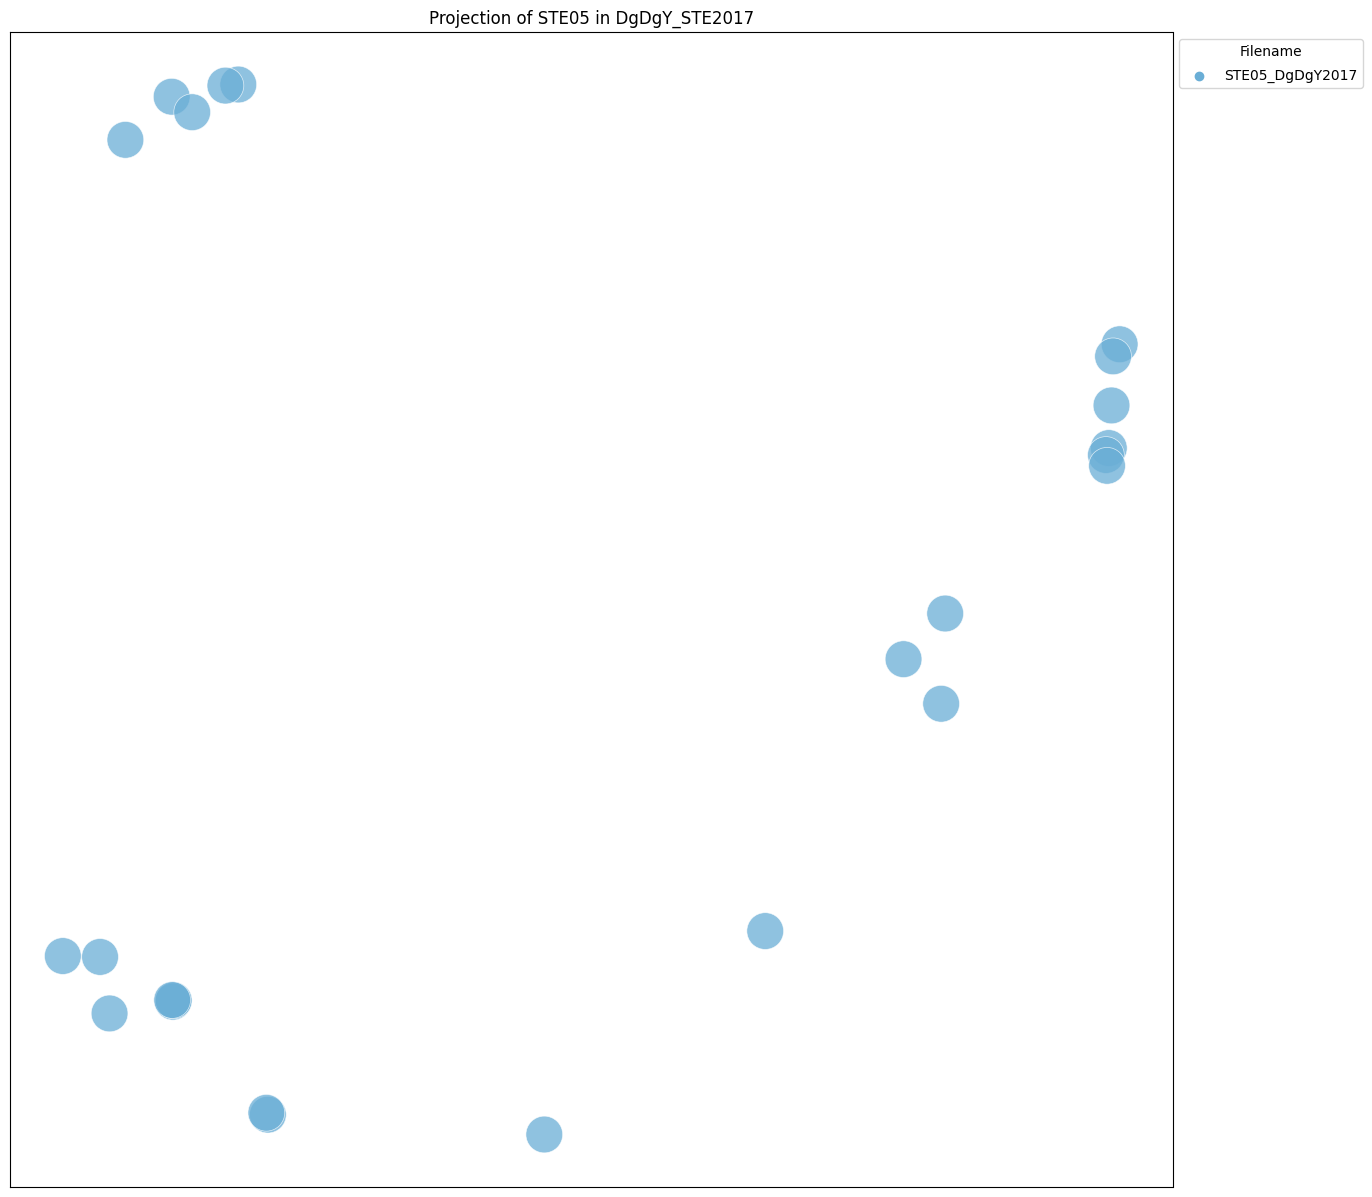

In [11]:
title = f"Projection of STE05 in {folder}"

by = ['filename']
ascending = [True]

individual.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='filename',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='Blues',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    title='Filename'
)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"{folder}_ste05_projection.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

In [12]:
mask = (
    (individual.filename == 'STE18_DgDgY2017')
)

songtype = individual[mask]
songtype.reset_index(inplace=True)
songtype = songtype.copy()

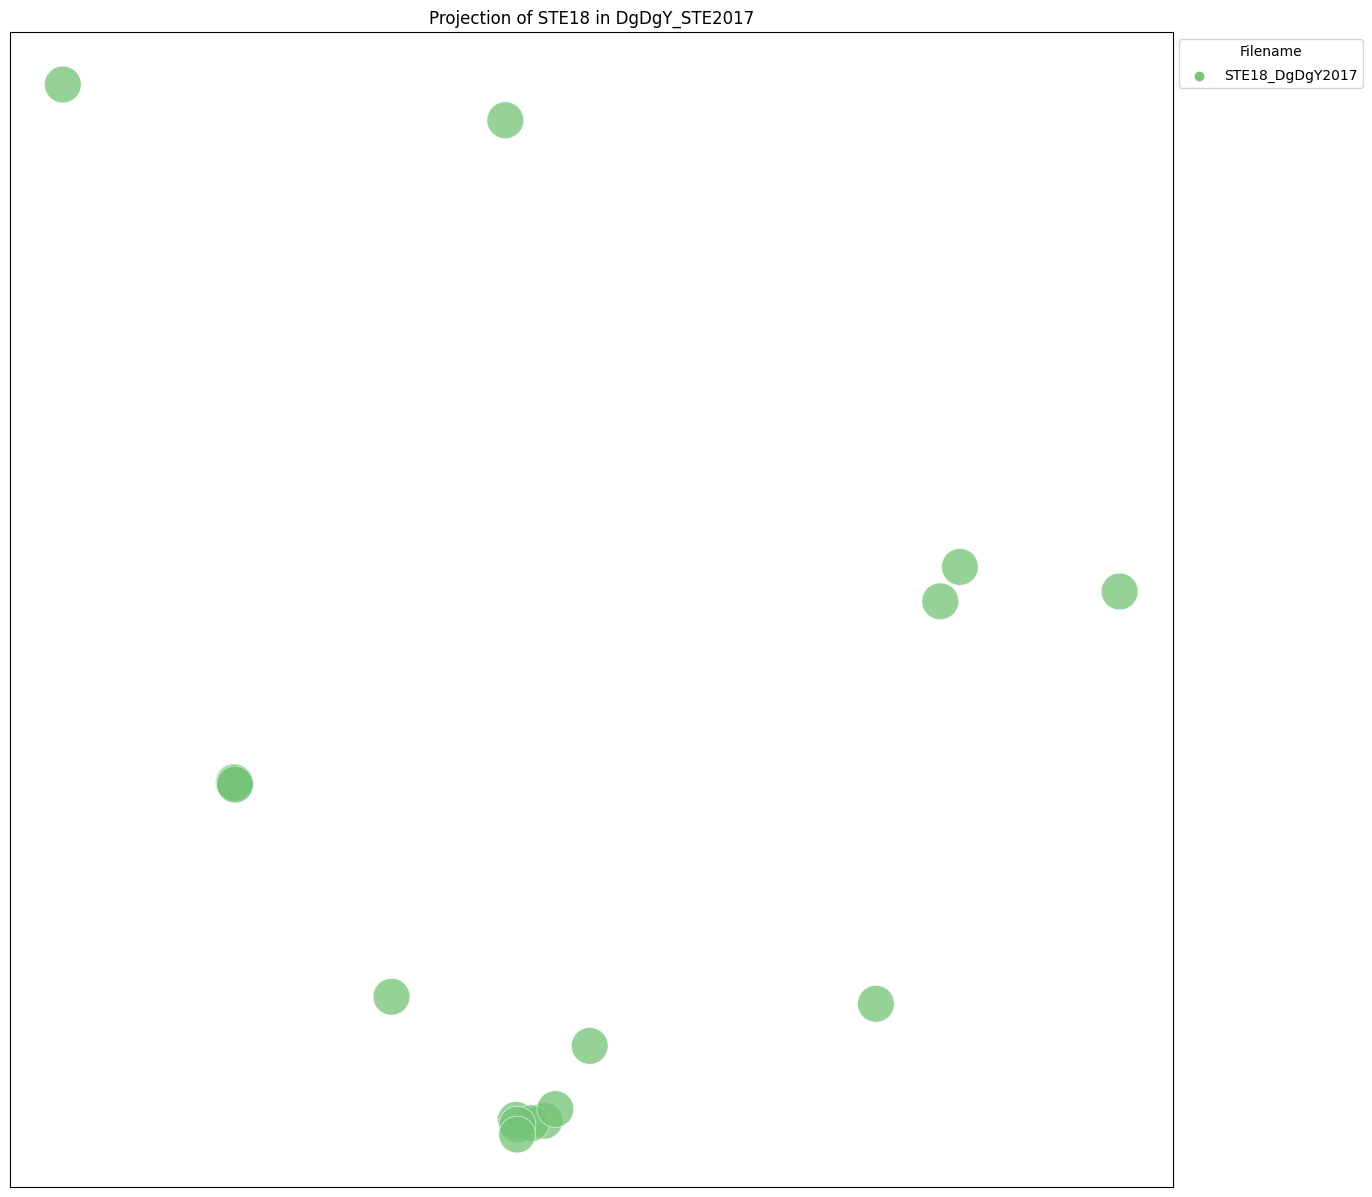

In [13]:
title = f"Projection of STE18 in {folder}"

by = ['filename']
ascending = [True]

individual.sort_values(
    ascending=ascending,
    by=by,
    inplace=True
)

figsize = (15, 15)
plt.figure(figsize=figsize)

ax = sns.scatterplot(
    songtype, 
    x='umap_x_2d', 
    y='umap_y_2d',
    hue='filename',
    alpha=0.75,
    legend='full',
    linewidth=0.5,
    palette='Greens',
    s=700
)

sns.move_legend(
    ax, 
    'upper left', 
    bbox_to_anchor=(1, 1),
    labelspacing=0.7,
    title='Filename'
)

ax.set(
    title=title,
    xlabel=None, 
    ylabel=None,
    xticklabels=[],
    yticklabels=[]
)

ax.tick_params(
    bottom=False,
    left=False
)

filename = f"{folder}_ste18_projection.png"
path = PROJECTION.joinpath(filename)

plt.savefig(
    path,
    bbox_inches='tight',
    dpi=300,
    format='png'
)